In [7]:
# Roll No: 22F-BSAI-06
# Project: Student Performance Predictor

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score

In [9]:
# Load and Initial Data Exploration

csv = pd.read_csv('student-mat.csv', sep=';')
print("Initial data preview:")
print(csv.head())

Initial data preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [10]:
# Data Preprocessing: Check for missing values
print("\nChecking for missing values:")
print(csv.isnull().sum())
# The output confirms no missing values, simplifying the preprocessing step.


Checking for missing values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [11]:
# Feature Selection and Target Preparation

# Features selected for predicting performance:
# 'studytime': Directly relates to student effort (time spent studying).
# 'absences': Relates to consistency and engagement.
# 'G1', 'G2': Previous period grades are strong predictors of the final grade (G3).
features = ['studytime', 'absences', 'G1', 'G2']
target = 'G3'

# Prepare features and target
X = csv[features]
y = csv[target]

# Create binary target (Pass/Fail) for Classification Models (Logistic Regression, Decision Tree)
y_binary = (y >= 10).astype(int)

In [12]:
# Data Scaling and Splitting

# Apply Standard Scaling to features.
# Scaling is crucial for Linear and Logistic Regression models to prevent features
# with larger ranges (like G1/G2) from disproportionately influencing the model coefficients.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

print("\nScaled features preview (used for classification models):")
print(X_scaled.head())


Scaled features preview (used for classification models):
   studytime  absences        G1        G2
0  -0.042286  0.036424 -1.782467 -1.254791
1  -0.042286 -0.213796 -1.782467 -1.520979
2  -0.042286  0.536865 -1.179147 -0.722415
3   1.150779 -0.464016  1.234133  0.874715
4  -0.042286 -0.213796 -1.480807 -0.190038


In [13]:


# Split the scaled data for Classification (X_scaled, y_binary)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42
)

# Split the original (unscaled) data for Linear Regression (X, y)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# Linear Regression Model (Predicting Final Marks - G3)

# Model Choice: Linear Regression is used because the target 'G3' is a continuous,
# numerical variable (final mark), making this a regression task.
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)

# Evaluate Linear Regression using R-squared (Coefficient of Determination)
lr_score = r2_score(y_test_lr, y_pred_lr)
print(f'\nLinear Regression Performance (Predicting G3)')
print(f'R² Score (Model Fit): {lr_score:.3f}')


Linear Regression Performance (Predicting G3)
R² Score (Model Fit): 0.796


In [15]:
# Logistic Regression Model (Classifying Pass/Fail)

# Model Choice: Logistic Regression is used for binary classification (Pass/Fail).
# It models the probability of passing using a sigmoid function.
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_cls, y_train_cls)
y_pred_log = log_model.predict(X_test_cls)

# Evaluate Logistic Regression
log_accuracy = accuracy_score(y_test_cls, y_pred_log)
log_precision = precision_score(y_test_cls, y_pred_log)
log_recall = recall_score(y_test_cls, y_pred_log)

In [16]:
# Decision Tree Classifier Model (Classifying Pass/Fail)

# Model Choice: Decision Tree is a non-linear, non-parametric model used for
# classification. It can capture complex non-linear relationships in the data.
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_cls, y_train_cls)
y_pred_dt = dt_model.predict(X_test_cls)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test_cls, y_pred_dt)
dt_precision = precision_score(y_test_cls, y_pred_dt)
dt_recall = recall_score(y_test_cls, y_pred_dt)


Classification Model Comparison (Pass/Fail) ---
           Logistic Regression  Decision Tree
Metric                                       
Accuracy                 0.899          0.899
Precision                0.958          0.923
Recall                   0.885          0.923


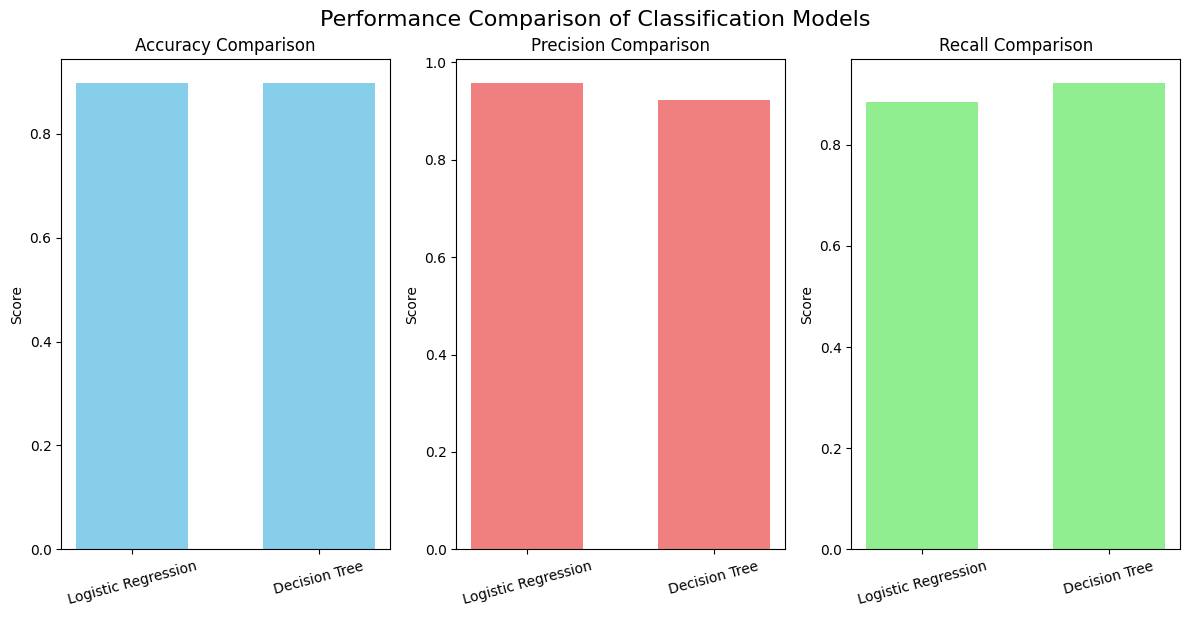

In [17]:
# Model Comparison and Visualization (Classification)

print("\nClassification Model Comparison (Pass/Fail) ---")

# Combine results into a DataFrame for clear comparison
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Logistic Regression': [log_accuracy, log_precision, log_recall],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall]
})

print(comparison.set_index('Metric').round(3))

models = ['Logistic Regression', 'Decision Tree']
accuracies = [log_accuracy, dt_accuracy]
precisions = [log_precision, dt_precision]
recalls = [log_recall, dt_recall]
x = range(len(models))

# Visualization of Model Comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(x, accuracies, width=0.6, color='skyblue')
plt.xticks(x, models, rotation=15)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

plt.subplot(1, 3, 2)
plt.bar(x, precisions, width=0.6, color='lightcoral')
plt.xticks(x, models, rotation=15)
plt.ylabel('Score')
plt.title('Precision Comparison')

plt.subplot(1, 3, 3)
plt.bar(x, recalls, width=0.6, color='lightgreen')
plt.xticks(x, models, rotation=15)
plt.ylabel('Score')
plt.title('Recall Comparison')

plt.tight_layout()
plt.suptitle('Performance Comparison of Classification Models', y=1.02, fontsize=16)
plt.show()